In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [2]:
# Generate some training data
min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)

In [3]:
# Create data and labels
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

Text(0.5, 1.0, 'Input data')

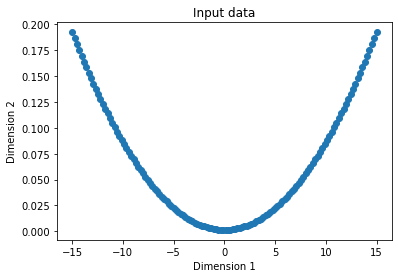

In [4]:
# Plot input data
plt.figure()
plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

In [5]:
nn = nl.net.newff([[min_val, max_val]], [10, 6, 1])


In [6]:
# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd


In [7]:
# Train the neural network
error_progress = nn.train(data, labels, epochs=2000, show=100, goal=0.01)

Epoch: 100; Error: 0.03769467207563901;
Epoch: 200; Error: 0.025037151411992517;
Epoch: 300; Error: 0.021477912990446914;
Epoch: 400; Error: 0.0181967109156722;
Epoch: 500; Error: 0.015241360412686589;
Epoch: 600; Error: 0.012743935474268869;
Epoch: 700; Error: 0.010812486686241903;
The goal of learning is reached


In [8]:
# Run the neural network on training datapoints
output = nn.sim(data)
y_pred = output.reshape(num_points)


Text(0.5, 1.0, 'Training error progress')

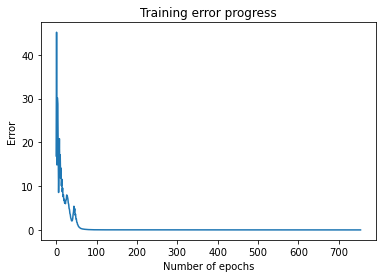

In [9]:
# Plot training error
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')


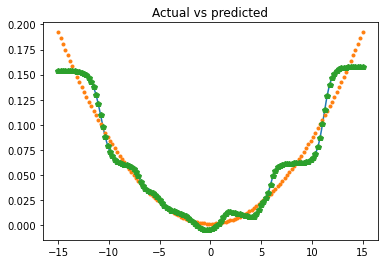

In [10]:
# Plot the output 
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)

plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs predicted')

plt.show()
